# разбейте исходную таблицу на 2: по полу пассажиров
# удалите пустые строки или заполните их соответствующими символами
# Построить гистограмму распределения пассажиров по возрасту
# Вычислите мин и макс, среднее, моду, медиану возраста пассажира каждого пола
# визуализировать возраст при помощи различных настроек метода plot

In [118]:
import pandas as pd
import matplotlib.pyplot as plt


In [119]:
df = pd.read_csv("titanic.csv")

In [120]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [121]:
# Разделяем таблицы по полу
df_female = df[df['Sex'] == 'female']
df_male = df[df['Sex'] == 'male']


In [122]:
# Заполняем пустые значения в 'Age' медианами соответствующей группы
df_female['Age'] = df_female['Age'].fillna(df_female['Age'].median())
df_male['Age'] = df_male['Age'].fillna(df_male['Age'].median())


/var/folders/z2/889mcdgx68s4l2p7x5f310hm0000gn/T/ipykernel_82438/2186215962.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_female['Age'] = df_female['Age'].fillna(df_female['Age'].median())
/var/folders/z2/889mcdgx68s4l2p7x5f310hm0000gn/T/ipykernel_82438/2186215962.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_male['Age'] = df_male['Age'].fillna(df_male['Age'].median())


In [123]:
print(f"min: {df_female['Age'].min()}; max: {df_female['Age'].max()}; mean: {df_female['Age'].mean()}; mod: {df_female['Age'].mode()[0]}; median: {df_female['Age'].median()}; ")

min: 0.75; max: 63.0; mean: 27.761146496815286; mod: 27.0; median: 27.0; 


In [124]:
print(f"min: {df_male['Age'].min()}; max: {df_male['Age'].max()}; mean: {df_male['Age'].mean()}; mod: {df_male['Age'].mode()[0]}; median: {df_male['Age'].median()}; ")

min: 0.42; max: 80.0; mean: 30.355580589254764; mod: 29.0; median: 29.0; 


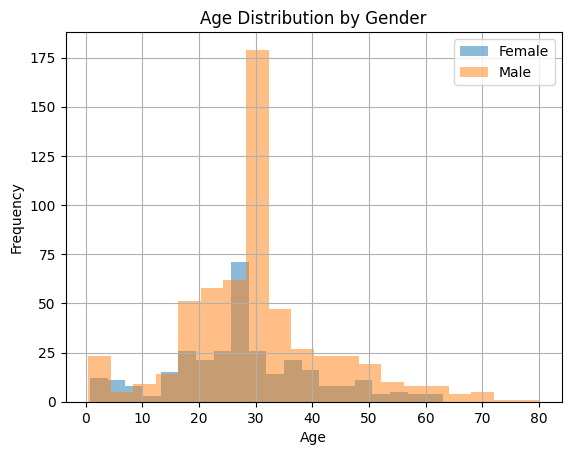

In [131]:
# Гистограммы распределения возраста
df_female['Age'].hist(alpha=0.5, label='Female', bins=20)
df_male['Age'].hist(alpha=0.5, label='Male', bins=20)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Gender')
plt.show()

In [127]:
# Вычисления статистики возраста
stats_female = {
    'min': df_female['Age'].min(),
    'max': df_female['Age'].max(),
    'mean': df_female['Age'].mean(),
    'mode': df_female['Age'].mode()[0],
    'median': df_female['Age'].median()
}

stats_male = {
    'min': df_male['Age'].min(),
    'max': df_male['Age'].max(),
    'mean': df_male['Age'].mean(),
    'mode': df_male['Age'].mode()[0],
    'median': df_male['Age'].median()
}


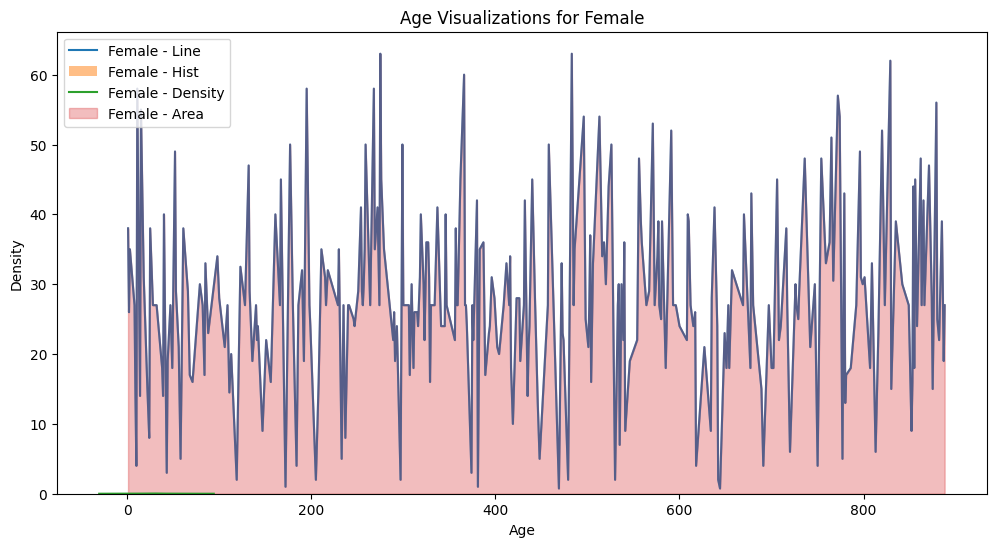

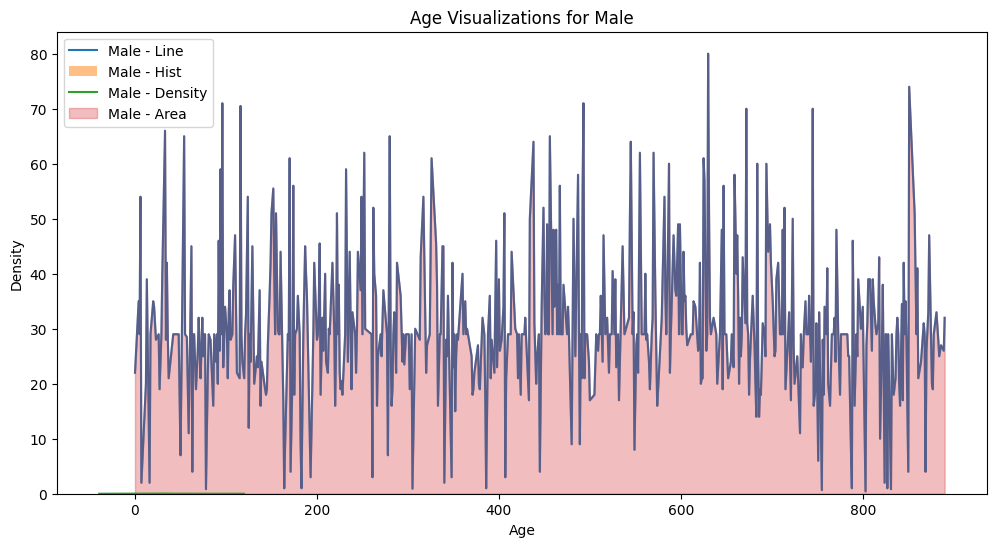

In [128]:
# Визуализация возраста для каждой группы
for group, data in zip(['Female', 'Male'], [df_female, df_male]):
    plt.figure(figsize=(12, 6))
    data['Age'].plot(kind='line', label=f'{group} - Line')
    data['Age'].plot(kind='hist', alpha=0.5, density=True, label=f'{group} - Hist', bins=20)
    data['Age'].plot(kind='density', label=f'{group} - Density')
    data['Age'].plot(kind='area', alpha=0.3, label=f'{group} - Area')
    plt.legend()
    plt.title(f'Age Visualizations for {group}')
    plt.xlabel('Age')
    plt.ylabel('Density')
    plt.show()